In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np

def MinMaxScaler(data) :
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [20]:
timesteps = seq_length = 7
data_dim = 5
output_dim = 1

xy = np.loadtxt('/content/drive/MyDrive/ML_Lab/report/12/data-02-stock_daily.csv', delimiter = ',')
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []

for i in range(0, len(y) - seq_length) :
  _x = x[i:i + seq_length]
  _y = y[i + seq_length]
  # print(_x, "->", _y)
  dataX.append(_x)
  dataY.append(_y)

In [21]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [22]:
import tensorflow as tf
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences = False, input_shape = [7, 5]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer = 'adam', loss = 'mse')
simpleRNN_model.fit(trainX, trainY, epochs = 100)

Epoch 1/100
16/16 [==============================] - 1s 6ms/step - loss: 0.0959
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 13/100
16/16 [=================

In [23]:
import matplotlib.pyplot as plt

def plot(output, title) :
  color = ["black", "red", "blue", "magenta"]
  label = ["y", "base", "LSTM", "base + layer"]
  plt.figure(figsize = (15, 10))
  for i, y in enumerate(output) :
    plt.plot(y, label = label[i], color = color[i])

  plt.title(title)
  plt.xlabel('day')
  plt.ylabel('close')
  plt.legend()
  plt.show()

7/7 [==============================] - 0s 3ms/step


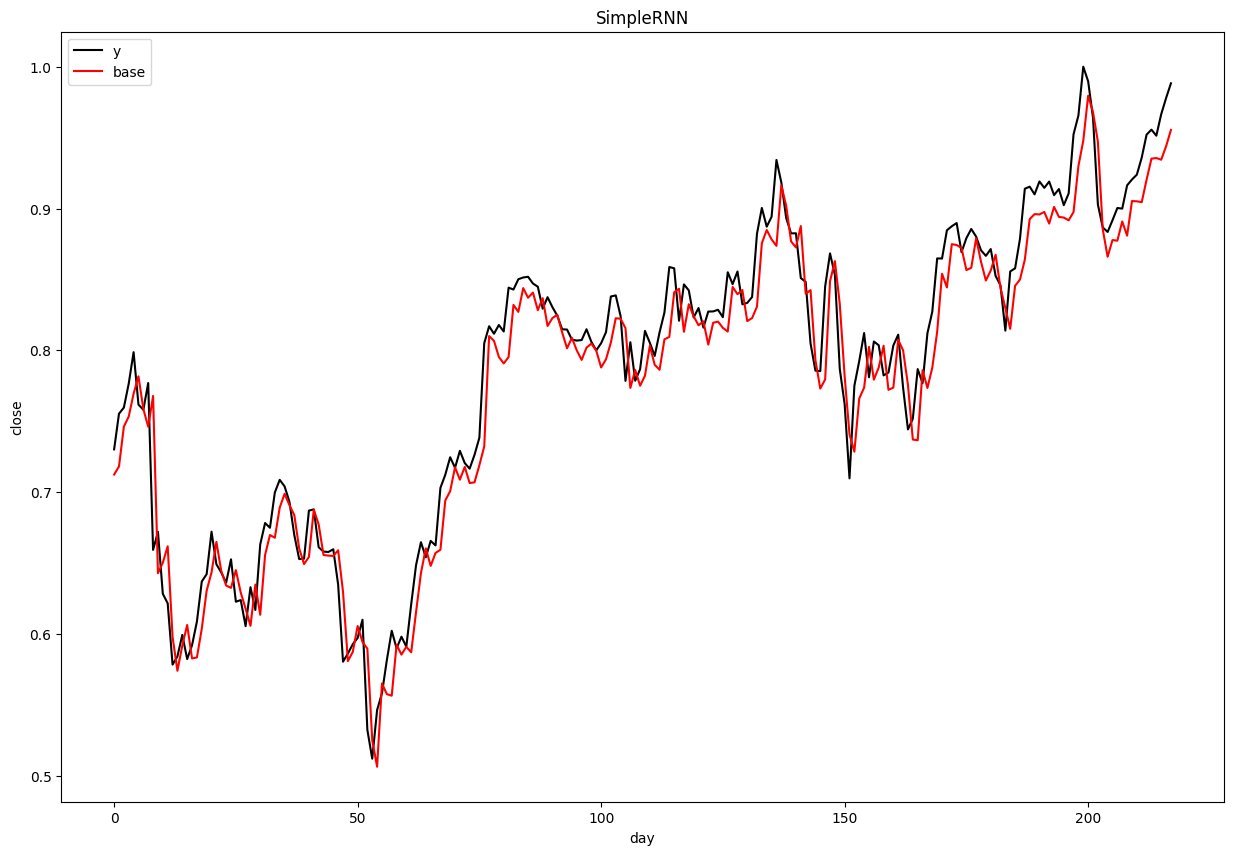

In [24]:
simpleRNN_pred = simpleRNN_model.predict(testX)
output = [testY, simpleRNN_pred]
plot(output, "SimpleRNN")

In [25]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences = False, input_shape = [7, 5]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer = 'adam', loss = 'mse')
LSTM_model.fit(trainX, trainY, epochs = 100)

Epoch 1/100
16/16 [==============================] - 2s 19ms/step - loss: 0.0340
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0065
Epoch 3/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0028
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 5/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0023
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 7/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 8/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0022
Epoch 9/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 10/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0021
Epoch 11/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 12/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0020
Epoch 13/100
16/16 [=====

7/7 [==============================] - 0s 7ms/step


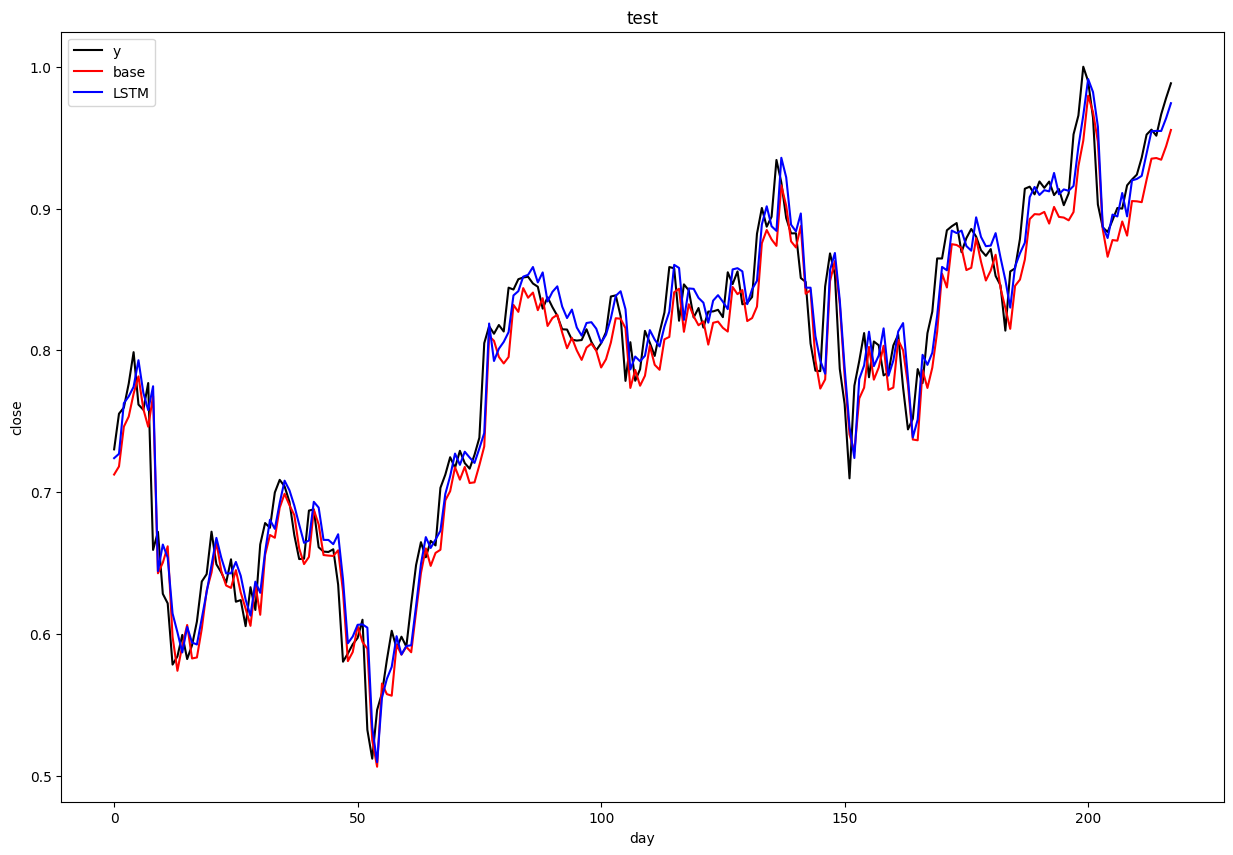

In [26]:
LSTM_pred = LSTM_model.predict(testX)
output = [testY, simpleRNN_pred, LSTM_pred]
plot(output, "test")

In [27]:
RNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, return_sequences = True, input_shape = [7, 5]),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences = True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences = True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer = 'adam', loss = 'mse')
LSTM_model.fit(trainX, trainY, epochs = 100)

Epoch 1/100
16/16 [==============================] - 2s 19ms/step - loss: 0.0011
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0010
Epoch 3/100
16/16 [==============================] - 0s 28ms/step - loss: 9.8510e-04
Epoch 4/100
16/16 [==============================] - 1s 32ms/step - loss: 9.3865e-04
Epoch 5/100
16/16 [==============================] - 0s 29ms/step - loss: 0.0010
Epoch 6/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0011
Epoch 7/100
16/16 [==============================] - 0s 19ms/step - loss: 9.0298e-04
Epoch 8/100
16/16 [==============================] - 0s 20ms/step - loss: 8.6442e-04
Epoch 9/100
16/16 [==============================] - 0s 20ms/step - loss: 8.6544e-04
Epoch 10/100
16/16 [==============================] - 0s 20ms/step - loss: 8.8978e-04
Epoch 11/100
16/16 [==============================] - 0s 19ms/step - loss: 8.6435e-04
Epoch 12/100
16/16 [==============================] - 0s 20ms/step - loss: 8.87

7/7 [==============================] - 0s 3ms/step


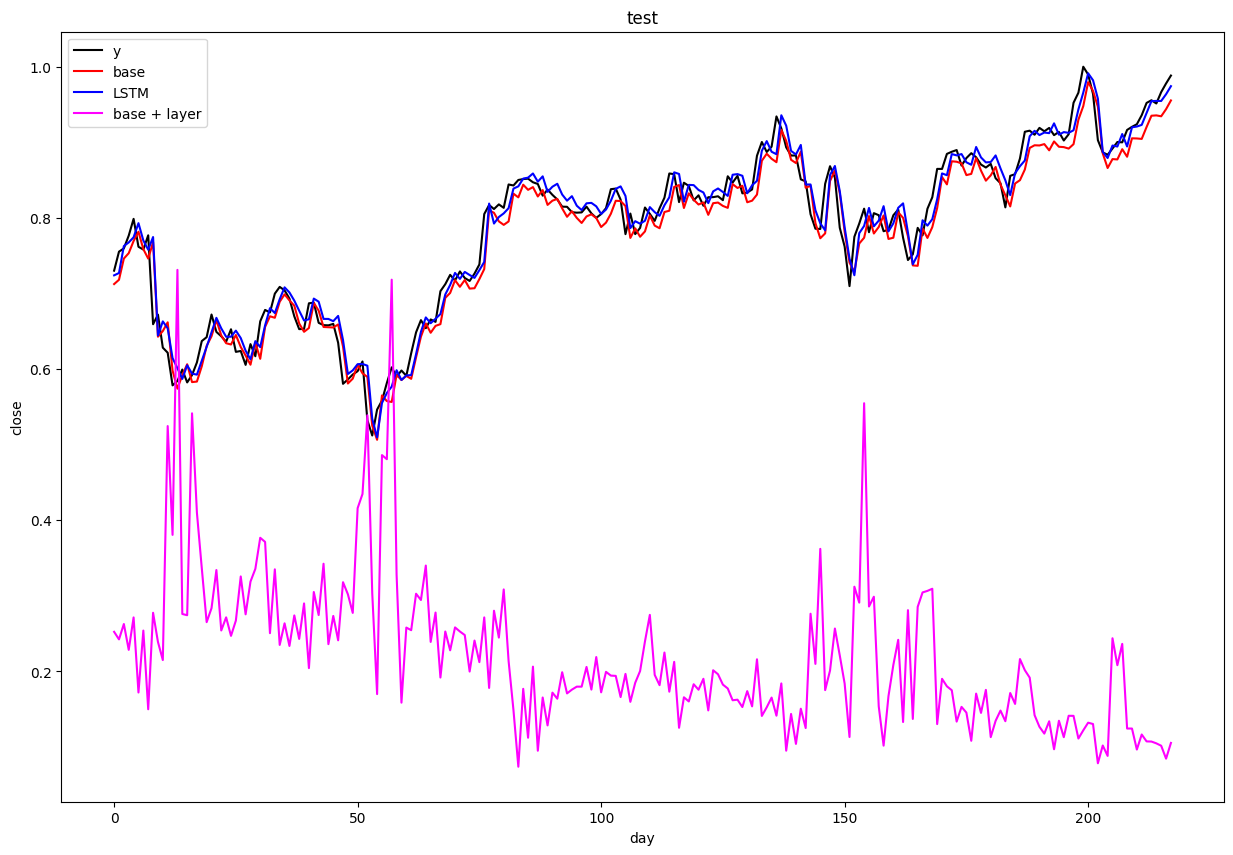

In [28]:
RNN_pred = RNN_model.predict(testX)
output = [testY, simpleRNN_pred, LSTM_pred, RNN_pred]
plot(output, "test")